# Свёрточные нейронные сети. Часть 1.

## Переключение версии TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

## Загрузка и подготовка датасета CIFAR

In [3]:
# (train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

train_x = train_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000, 1) uint8
(10000, 1) uint8


In [4]:
train_y = np.array([i[0] for i in train_y])
test_y = np.array([i[0] for i in test_y])

In [5]:
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

(50000,) uint8
(10000,) uint8


In [6]:
Targetlabel = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]

## Визуализация датасета CIFAR

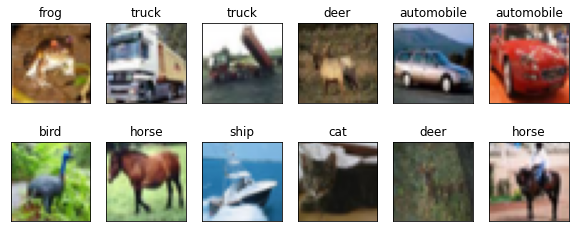

In [7]:
some_samples = train_x[:12, ...]
some_samples_y = train_y[:12, ...]

fig = plt.figure(figsize=(10, 4))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(2, 6, j+1)
    # ax.imshow(some_samples[j,:,:,0], cmap='gray')
    # ax.imshow(some_samples[j,:,:,:], cmap=plt.cm.binary)
    ax.imshow(some_samples[j,:,:,:])
    plt.title(Targetlabel[some_samples_y[j]])
    plt.xticks([]), plt.yticks([])
plt.show()

## Создание модели CNN

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Подготовка к обучению

In [63]:
LEARNING_RATE = 0.001
myoptimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

In [64]:
model.compile(
              # optimizer='sgd',
              optimizer=myoptimizer,
              loss='sparse_categorical_crossentropy',
              # loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [62]:
# tf.keras.optimizers

In [14]:
# model.summary()

In [61]:
# tf.keras.utils.plot_model(model,show_shapes=True)

## Обучение модели

In [65]:
NUM_EPOCHS = 4

model.fit(train_x, train_y, epochs=NUM_EPOCHS)

Epoch 1/4
1563/1563 [==============================] - 6s 3ms/step - loss: 1.3321 - accuracy: 0.5252
Epoch 2/4
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9274 - accuracy: 0.6733
Epoch 3/4
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7207 - accuracy: 0.7460
Epoch 4/4
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5507 - accuracy: 0.8037


## Оценка качества модели

In [66]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.9146 - accuracy: 0.6981


[0.9145905375480652, 0.6980999708175659]

In [67]:
from sklearn.metrics import classification_report
predicted = model.predict(test_x)

In [68]:
print(classification_report(test_y,predicted.argmax(axis=1),target_names=Targetlabel))

              precision    recall  f1-score   support

    airplane       0.71      0.78      0.74      1000
  automobile       0.84      0.81      0.83      1000
        bird       0.70      0.55      0.61      1000
         cat       0.46      0.57      0.51      1000
        deer       0.78      0.54      0.64      1000
         dog       0.53      0.65      0.59      1000
        frog       0.81      0.71      0.76      1000
       horse       0.68      0.80      0.74      1000
        ship       0.81      0.83      0.82      1000
       truck       0.80      0.74      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



## Пример инференса модели

In [69]:
sample = test_x[0, ...]
prediction = model(sample[None, ...])[0]
print(prediction)

tf.Tensor(
[0.01508285 0.00149184 0.00740461 0.5515678  0.00080515 0.38049495
 0.03131415 0.00599326 0.00487776 0.00096767], shape=(10,), dtype=float32)


## Функция для инференса и отображения результата предсказания

In [70]:
def test_digit(sample):
    
    prediction = model(sample[None, ...])[0]
    ans = np.argmax(prediction)
    
    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(1, 2, 1)
    # ax.imshow(sample[:,:,0], cmap='gray')
    ax.imshow(sample[:,:,:])
    plt.xticks([]), plt.yticks([])

    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()
    
    print('Predicted number: {}'.format(ans))

## Запуск предсказания для изображения случайной цифры из CIFAR

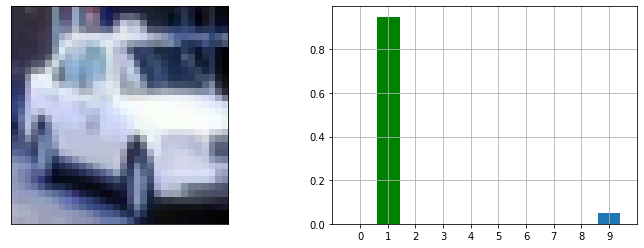

Predicted number: 1
1->automobile


In [75]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]
test_digit(sample)

print(str(test_y[idx]) + "->"+Targetlabel[test_y[idx]])